In [ ]:
import numpy as np
import pandas as pd
from faker import Faker
from names_dataset import NameDataset

## Playing with Libraries...

In [2]:
nd = NameDataset()

In [3]:
data = nd.search('ali')['first_name']['country']
countries_rank = sorted(list(data.keys()), key=lambda x: data[x])[::-1]
for c in  countries_rank:
    print(f"{c+' ':-<30}--> {data[c]}")

Turkey -------------------------> 0.25
Egypt --------------------------> 0.149
Saudi Arabia -------------------> 0.146
Iraq ---------------------------> 0.142
Morocco ------------------------> 0.079
Algeria ------------------------> 0.054
Iran, Islamic Republic of ------> 0.052
Syrian Arab Republic -----------> 0.05
Tunisia ------------------------> 0.04
United Arab Emirates -----------> 0.037


## Generate Fake Data

In [4]:
en_name = Faker()
fa_name = Faker("Fa")

In [5]:
def make_name() :
    '''
    returns :
        50% Persian name
        50% English name
    '''
    return np.random.choice([en_name.name(), fa_name.name()], p=[0.5, 0.5])

In [6]:
df = pd.DataFrame(
    [make_name() for n in range(1000)],
    columns=['name']
)
df   

,name
0,Ryan Martinez
1,یگانه ظفری
2,Mr. Frank Russell
3,Jennifer Hopkins
4,Sharon Ingram
...,...
995,Rebecca Foley
996,سرکار خانم نرگس نوروزی
997,جناب آقای دکتر حسين بهمنی
998,ساميار تهرانی


In [7]:
# removing the names that have length above 2 like Dr. ali karimi
df = df['name'].apply(lambda x: x if len(x.split())<3 else np.NaN).dropna()
df = df.to_frame('name') # converting Serie to DataFrame
df

,name
0,Ryan Martinez
1,یگانه ظفری
3,Jennifer Hopkins
4,Sharon Ingram
5,Steven Koch
...,...
993,اميرحسين تنزیلی
994,Anthony Ward
995,Rebecca Foley
998,ساميار تهرانی


In [8]:
df['f_name'] = df['name'].apply(lambda x: x.split()[0])
df['l_name'] = df['name'].apply(lambda x: x.split()[1])
df

,name,f_name,l_name
0,Ryan Martinez,Ryan,Martinez
1,یگانه ظفری,یگانه,ظفری
3,Jennifer Hopkins,Jennifer,Hopkins
4,Sharon Ingram,Sharon,Ingram
5,Steven Koch,Steven,Koch
...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی
994,Anthony Ward,Anthony,Ward
995,Rebecca Foley,Rebecca,Foley
998,ساميار تهرانی,ساميار,تهرانی


In [9]:
def gender_detection(name) :
    if (result := nd.search(name)['first_name']) == None :
        return
    else :
        return max(result['gender'], key=lambda x: result['gender'][x])

In [10]:
df['gender'] = df['f_name'].apply(lambda name: gender_detection(name))
df

,name,f_name,l_name,gender
0,Ryan Martinez,Ryan,Martinez,Male
1,یگانه ظفری,یگانه,ظفری,Female
3,Jennifer Hopkins,Jennifer,Hopkins,Female
4,Sharon Ingram,Sharon,Ingram,Female
5,Steven Koch,Steven,Koch,Male
...,...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی,Male
994,Anthony Ward,Anthony,Ward,Male
995,Rebecca Foley,Rebecca,Foley,Female
998,ساميار تهرانی,ساميار,تهرانی,None


In [11]:
df['gender'].value_counts()

Male      422
Female    391
Name: gender, dtype: int64

<AxesSubplot:>

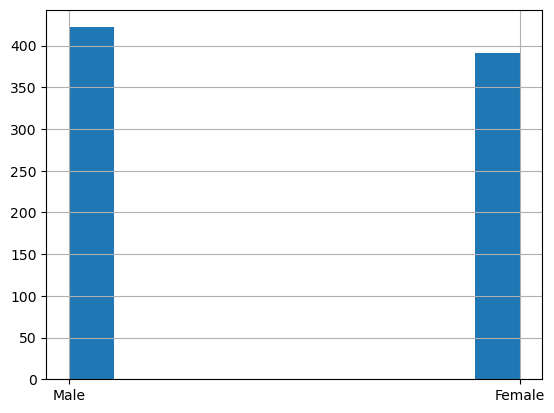

In [12]:
df['gender'].hist()

Write a code that adds 3 more columns to the dataframe:

- Gender Probability
- Country
- Country Probability

The final dataframe should look like this:

In [13]:
df

,name,f_name,l_name,gender
0,Ryan Martinez,Ryan,Martinez,Male
1,یگانه ظفری,یگانه,ظفری,Female
3,Jennifer Hopkins,Jennifer,Hopkins,Female
4,Sharon Ingram,Sharon,Ingram,Female
5,Steven Koch,Steven,Koch,Male
...,...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی,Male
994,Anthony Ward,Anthony,Ward,Male
995,Rebecca Foley,Rebecca,Foley,Female
998,ساميار تهرانی,ساميار,تهرانی,None


#### adding gender probability

In [120]:
max(nd.search('hi')['first_name']['gender'].values())

0.688

In [116]:
def gender_probability(name) :
    return max(nd.search(name)['first_name']['gender'].values())

In [79]:
gender_probability('arta')

0.864

In [148]:
f = np.frompyfunc(gender_probability, 1, 1) # making a universal function

In [142]:
def gender_probability(name) :
    if (result := nd.search(name)['first_name']) == None :
        return
    return max(nd.search(name)['first_name']['gender'].values())

f = np.frompyfunc(gender_probability, 1, 1) # not neccessery ( universal function)

In [154]:
df['gender_probability'] = df['f_name'].apply(gender_probability)
df

,name,f_name,l_name,gender,gender_probability
0,Ryan Martinez,Ryan,Martinez,Male,0.979
1,یگانه ظفری,یگانه,ظفری,Female,0.812
3,Jennifer Hopkins,Jennifer,Hopkins,Female,0.993
4,Sharon Ingram,Sharon,Ingram,Female,0.967
5,Steven Koch,Steven,Koch,Male,0.992
...,...,...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی,Male,0.903
994,Anthony Ward,Anthony,Ward,Male,0.990
995,Rebecca Foley,Rebecca,Foley,Female,0.993
998,ساميار تهرانی,ساميار,تهرانی,None,NaN


#### adding country

In [162]:
nd.search('arin')['first_name']['country']

{'Bangladesh': 0.049,
 'Israel': 0.035,
 'Iraq': 0.193,
 'Malaysia': 0.199,
 'Nigeria': 0.034,
 'Saudi Arabia': 0.028,
 'Singapore': 0.03,
 'Syrian Arab Republic': 0.054,
 'Turkey': 0.202,
 'United States': 0.176}

In [167]:
s = nd.search('arin')['first_name']['country']
max(nd.search('arin')['first_name']['country'], key=lambda x: s[x])

'Turkey'

In [183]:
def most_country(name) :
    if nd.search(name)['first_name'] is None :
        return 
    s = nd.search(name)['first_name']['country']
    return max(nd.search(name)['first_name']['country'], key=lambda x: s[x])

In [184]:
most_country('hossein')

'Iran, Islamic Republic of'

In [185]:
df['country'] = df['f_name'].apply(most_country)
df

,name,f_name,l_name,gender,gender_probability,country
0,Ryan Martinez,Ryan,Martinez,Male,0.979,United States
1,یگانه ظفری,یگانه,ظفری,Female,0.812,"Iran, Islamic Republic of"
3,Jennifer Hopkins,Jennifer,Hopkins,Female,0.993,United States
4,Sharon Ingram,Sharon,Ingram,Female,0.967,United States
5,Steven Koch,Steven,Koch,Male,0.992,United States
...,...,...,...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی,Male,0.903,"Iran, Islamic Republic of"
994,Anthony Ward,Anthony,Ward,Male,0.990,United States
995,Rebecca Foley,Rebecca,Foley,Female,0.993,United States
998,ساميار تهرانی,ساميار,تهرانی,None,NaN,None


#### adding country probability

In [190]:
max(nd.search('arin')['first_name']['country'].values())

0.202

In [192]:
def country_probability(name) :
    if nd.search(name)['first_name'] is None : return
    return max(nd.search(name)['first_name']['country'].values())

In [209]:
df['country_probability'] = df['f_name'].apply(country_probability)
df

,name,f_name,l_name,gender,gender_probability,country,country_probability
0,Ryan Martinez,Ryan,Martinez,Male,0.979,United States,0.465
1,یگانه ظفری,یگانه,ظفری,Female,0.812,"Iran, Islamic Republic of",0.435
3,Jennifer Hopkins,Jennifer,Hopkins,Female,0.993,United States,0.503
4,Sharon Ingram,Sharon,Ingram,Female,0.967,United States,0.308
5,Steven Koch,Steven,Koch,Male,0.992,United States,0.341
...,...,...,...,...,...,...,...
993,اميرحسين تنزیلی,اميرحسين,تنزیلی,Male,0.903,"Iran, Islamic Republic of",0.362
994,Anthony Ward,Anthony,Ward,Male,0.990,United States,0.372
995,Rebecca Foley,Rebecca,Foley,Female,0.993,United States,0.327
998,ساميار تهرانی,ساميار,تهرانی,None,NaN,None,NaN


<br> <br> <Br>

In [210]:
min(df['gender_probability'])

0.501

In [211]:
df.query("gender_probability==0.501")

,name,f_name,l_name,gender,gender_probability,country,country_probability
150,سبحان سرخوشیان,سبحان,سرخوشیان,Female,0.501,Egypt,0.59
843,سبحان زارع,سبحان,زارع,Female,0.501,Egypt,0.59
920,سبحان ضابطی,سبحان,ضابطی,Female,0.501,Egypt,0.59
